In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(-10.0,15.0,5200)
y = np.sqrt(20**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [4]:
x1 = np.linspace(-10.0,15.0,5200)
y1 = np.sqrt(15**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

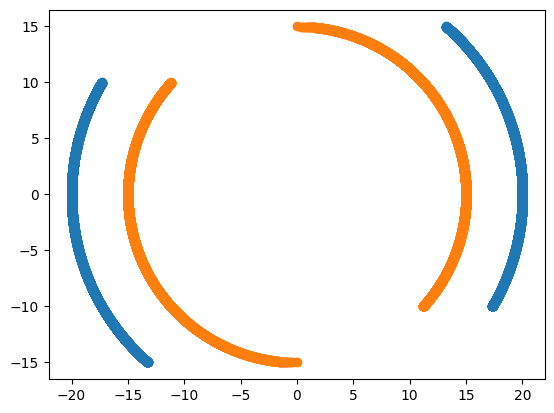

In [5]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [6]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['x1','x2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns = ['x1','x2'])
df2['Y'] = 1
df = pd.concat([df1,df2],ignore_index = True)
df.head(5)

,x1,x2,Y
0,17.320508,-10.000000,0
1,17.323283,-9.995191,0
2,17.326057,-9.990383,0
3,17.328829,-9.985574,0
4,17.331599,-9.980766,0


In [7]:
#Independent and Dependent Features
x = df.iloc[:, :2]
y = df.Y

In [8]:
y

0        0
1        0
2        0
3        0
4        0
        ..
20795    1
20796    1
20797    1
20798    1
20799    1
Name: Y, Length: 20800, dtype: int64

In [9]:
#split the data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [10]:
y_train

714      0
10601    1
20382    1
17723    1
17543    1
        ..
13123    1
19648    1
9845     0
10799    1
2732     0
Name: Y, Length: 15600, dtype: int64

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [12]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.5076923076923077

In [13]:
print(df.head())

          x1         x2  Y
0  17.320508 -10.000000  0
1  17.323283  -9.995191  0
2  17.326057  -9.990383  0
3  17.328829  -9.985574  0
4  17.331599  -9.980766  0


In [14]:
#Finding components for the Polynomial Kernel
#x1,x2,x1_square,x2_square,x1*x2
df['x1_square'] = df['x1']**2
df['x2_square'] = df['x2']**2
df['x1*x2'] = (df['x1']*df['x2'])
print(df.head())

          x1         x2  Y   x1_square   x2_square       x1*x2
0  17.320508 -10.000000  0  300.000000  100.000000 -173.205081
1  17.323283  -9.995191  0  300.096149   99.903851 -173.149533
2  17.326057  -9.990383  0  300.192252   99.807748 -173.093942
3  17.328829  -9.985574  0  300.288309   99.711691 -173.038305
4  17.331599  -9.980766  0  300.384319   99.615681 -172.982625


In [15]:
#Independent and Dependent Features
x = df[['x1','x2','x1_square','x2_square','x1*x2']]
y = df['Y']

In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
20795    1
20796    1
20797    1
20798    1
20799    1
Name: Y, Length: 20800, dtype: int64

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [18]:
print(x_train)

              x1         x2   x1_square   x2_square       x1*x2
714    18.891245  -6.566647  356.879142   43.120858 -124.052146
10601  11.974826  -9.033468  143.396456   81.603544 -108.174207
20382  -7.492329 -12.994807   56.134999  168.865001   97.361372
17723 -14.998548  -0.208694  224.956447    0.043553    3.130107
17543 -14.985611   0.656857  224.568539    0.431461   -9.843405
...          ...        ...         ...         ...         ...
13123  14.677466   3.093864  215.428004    9.571996   45.410086
19648 -11.636513  -9.465282  135.408441   89.591559  110.142877
9845  -15.742378 -12.336026  247.822459  152.177541  194.198384
10799  12.636914  -8.081362  159.691591   65.308409 -102.123473
2732   19.752426   3.137142  390.158342    9.841658   61.966161

[15600 rows x 5 columns]


In [19]:
import plotly.express as px
fig = px.scatter_3d(df,x = 'x1_square', y = 'x2_square',z = 'x1*x2',)
fig.show()

In [20]:
fig = px.scatter_3d(df,x = 'x1_square', y = 'x2_square',z = 'x1*x2', color = 'Y')

fig.show()

In [21]:
classifier = SVC(kernel='linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

1.0